# Problema Numérico de un Sistema con 1GDL
En este programa se resolverá de manera numérica un problema de un grado de libertad utilizando la notación de espacion de estados y el criterio de convergencia considerando la condición de conservación de la energía.

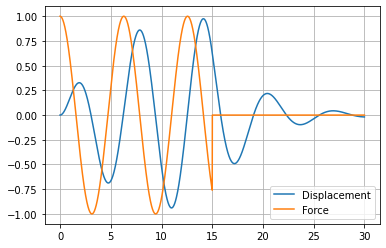

Critical Damping 2.7386127875258306
Natural Frequency: 1.0


In [32]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

#Variables
m = 2.0 #Mass
k = 2.0 #Spring Constant
c = 1.0 #Critical Damping = 2 * SQRT(m*k) = 4.0


F0 = 1.0
delta_t = 0.001
omega = 1.0
time = np.arange(0.0, 30.0, delta_t)

#Initial state
y = np.array([0, 0]) # [Velocity, displacement]
A = np.array([[m, 0], [0, 1]])
B = np.array([[c, k], [-1, 0]])
F = np.array([0.0, 0.0])

Y = []
force = []

#Time-stepping solution
for t in time:
    
    if t <= 15.0:
        F[0] = F0*np.cos(omega * t)
    else:
        F[0] = 0.0
    
    y = y + delta_t * inv(A).dot(F - B.dot(y))
    Y.append(y[1])
    force.append(F[0])

    KE = 0.5 * m * y[0]**2
    PE = 0.5 * k * y[1]**2
    
    if t % 1 <= 0.1:
        #print(f'Total Energy {KE + PE}')
        pass
    
    

#Plot the solution
t = [i for i in time]
plt.plot(t, Y)
plt.plot(t, force)
plt.grid(True)
plt.legend(['Displacement', 'Force'], loc='lower right')
plt.show()


print(f'Critical Damping {np.sqrt((-c**2+4*m*k)/2)}')
print (f'Natural Frequency: {np.sqrt(k/m)}')

Cuando la respuesta que se produce parece hacer ganar al desplazamiento, en lugar de mantenerlo constante, significa que el integrador no es suficientemente estable, por lo tanto tenemos que hacer a $\Delta t$ más pequeño. Esto se puede comprobar al cuantificar la energía total del sistema, la cual va en aumento